<a href="https://colab.research.google.com/github/MFoenders/Machine-Learning/blob/main/Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Library**


In [1]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay


**Read the data**

In [ ]:
url = "https://drive.google.com/file/d/1ouLpavhfLMXjJw1eqZncoLgCGQVjYj7C/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)

In [ ]:
data.head(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [ ]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrTyp

In [ ]:
data = data.drop(['Id'],axis=1)

In [ ]:
y=data.pop('Expensive')
X=data

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   MSZoning       1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Heating        1460 non-null   object 
 12  Street         1460 non-null   object 
 13  CentralAir     1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtCond

In [ ]:
X.isna().sum()

LotArea             0
LotFrontage       259
TotalBsmtSF         0
BedroomAbvGr        0
Fireplaces          0
PoolArea            0
GarageCars          0
WoodDeckSF          0
ScreenPorch         0
MSZoning            0
Condition1          0
Heating             0
Street              0
CentralAir          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
KitchenQual         0
FireplaceQu       690
MSSubClass          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
KitchenAbvGr        0
TotRmsAbvGrd        0
GarageYrBlt        81
GarageArea          0
OpenPorchSF         0
EnclosedPo

**Ideas:**
1. Check the unnecessary columns
2. Feature Enginering

I deceided to drop the following columns as well:
**PoolQC, Fence and MiscFeature**

In [ ]:
X = X.drop(['PoolQC','Fence','MiscFeature'],axis=1)

In [ ]:
X.isna().sum()

LotArea             0
LotFrontage       259
TotalBsmtSF         0
BedroomAbvGr        0
Fireplaces          0
PoolArea            0
GarageCars          0
WoodDeckSF          0
ScreenPorch         0
MSZoning            0
Condition1          0
Heating             0
Street              0
CentralAir          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
KitchenQual         0
FireplaceQu       690
MSSubClass          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
KitchenAbvGr        0
TotRmsAbvGrd        0
GarageYrBlt        81
GarageArea          0
OpenPorchSF         0
EnclosedPo

In [ ]:
X = X.drop(['Alley','FireplaceQu'],axis=1)

In [ ]:
X.head(7)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,RL,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,RL,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,RL,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,RL,...,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,RL,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,14115,85.0,796,1,0,0,2,40,0,RL,...,Ex,SBrkr,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,10084,75.0,1686,3,1,0,2,255,0,RL,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
X.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'MSSubClass', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtFinType2', 'HeatingQC', 'Electrica

In [ ]:
X[['BsmtFinSF2']].head(5)

,BsmtFinSF2
0,0
1,0
2,0
3,0
4,0


**split the data**

In [ ]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Build the Pipeline**

In [ ]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

In [ ]:
X_num.head(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSSubClass,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold
0,8450,65.0,856,3,0,0,2,0,0,60,...,1,8,2003.0,548,61,0,0,0,2,2008
1,9600,80.0,1262,3,1,0,2,298,0,20,...,1,6,1976.0,460,0,0,0,0,5,2007
2,11250,68.0,920,3,1,0,2,0,0,60,...,1,6,2001.0,608,42,0,0,0,9,2008
3,9550,60.0,756,3,1,0,3,0,0,70,...,1,7,1998.0,642,35,272,0,0,2,2006
4,14260,84.0,1145,4,1,0,3,192,0,60,...,1,9,2000.0,836,84,0,0,0,12,2008


**Build two mini Pipeline [Dealing with missing data]**

In [ ]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean")
     ,MinMaxScaler()
    )

In [ ]:
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

In [ ]:
full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRem...
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRem...
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
y_train_pred = full_pipeline.predict(X_train)

In [ ]:
accuracy_score(y_true=y_train,y_pred=y_train_pred).round(2)

1.0

In [ ]:
y_test_pred=full_pipeline.predict(X_test)

In [ ]:
accuracy_score(y_true=y_test,y_pred=y_test_pred).round(2)

0.93

**Result**: train 1.0> test 0.92

**Tune the model with the random then the grid search**

1. Using the **grid_random**

In [ ]:
param_grid_random = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(1, 20, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2),
    "decisiontreeclassifier__min_samples_split": range(2, 10),
    "decisiontreeclassifier__max_leaf_nodes": range(2, 10),
    "decisiontreeclassifier__criterion": ["gini", "entropy"]
}


In [ ]:
search_random = RandomizedSearchCV(
    full_pipeline,
    param_grid_random,
    cv=10,
    verbose=1,
    random_state=123
)

In [ ]:
search_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual'...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median'],
                                        'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'decisiontreeclassifier__max_depth': range(1, 20, 2),
                                        'decisiontreeclassifier__max_leaf_nodes': range(2, 10),
                                        'decisiontreeclassifier__min_samples_leaf': range(3, 12, 2),
                                        'decisiontreeclassifier__min_samples_split': range(2, 10)},
                   random_state=123, verbose=1)

In [ ]:
search_random.best_params_

{'decisiontreeclassifier__min_samples_split': 5,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__max_leaf_nodes': 4,
 'decisiontreeclassifier__max_depth': 9,
 'decisiontreeclassifier__criterion': 'gini',
 'columntransformer__num_pipe__simpleimputer__strategy': 'median'}

In [ ]:
search_random.best_score_.round(2)

0.92

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(6,11),
    "decisiontreeclassifier__min_samples_leaf": range(2, 5),
    "decisiontreeclassifier__criterion": ["gini", "entropy"],
    "decisiontreeclassifier__max_leaf_nodes": range(2, 6),
    "decisiontreeclassifier__min_samples_split": range(2, 7)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'Overa...
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(6, 11),
                         'decisiontreeclassifier__max_leaf_nodes': range(2, 6),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 5),
                         'decisiontreeclassifier__min_samples_split': range(2, 7)},
             verbose=1)

In [ ]:
scores = {"dtree" : search.best_score_.round(2)}

scores

{'dtree': 0.92}

Check the **Feature_importances**

In [ ]:
X.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'MSSubClass', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtFinType2', 'HeatingQC', 'Electrica

In [ ]:
X.columns.shape

(74,)

In [ ]:
full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRem...
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
#search_random.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_

In [ ]:
#pd.DataFrame(search_random.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_)#[0].sort_values()

In [ ]:
#pd.DataFrame(search.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_, index = X.columns)[0].sort_values()

**Check the Accurarcy**

In [ ]:
accuracy_score(search.predict(X_train), y_train).round(2)

0.93

In [ ]:
accuracy_score(search.predict(X_test), y_test).round(2)

0.92

**Result:**
**train 0,93 > test 0,92 it is maybe a bit overfitting**

**ConfusionMetrix**

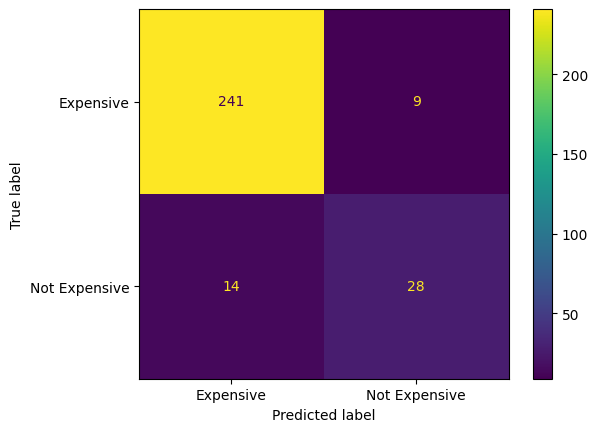

In [ ]:
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Expensive', 'Not Expensive']);

**Plot the optimal tree**

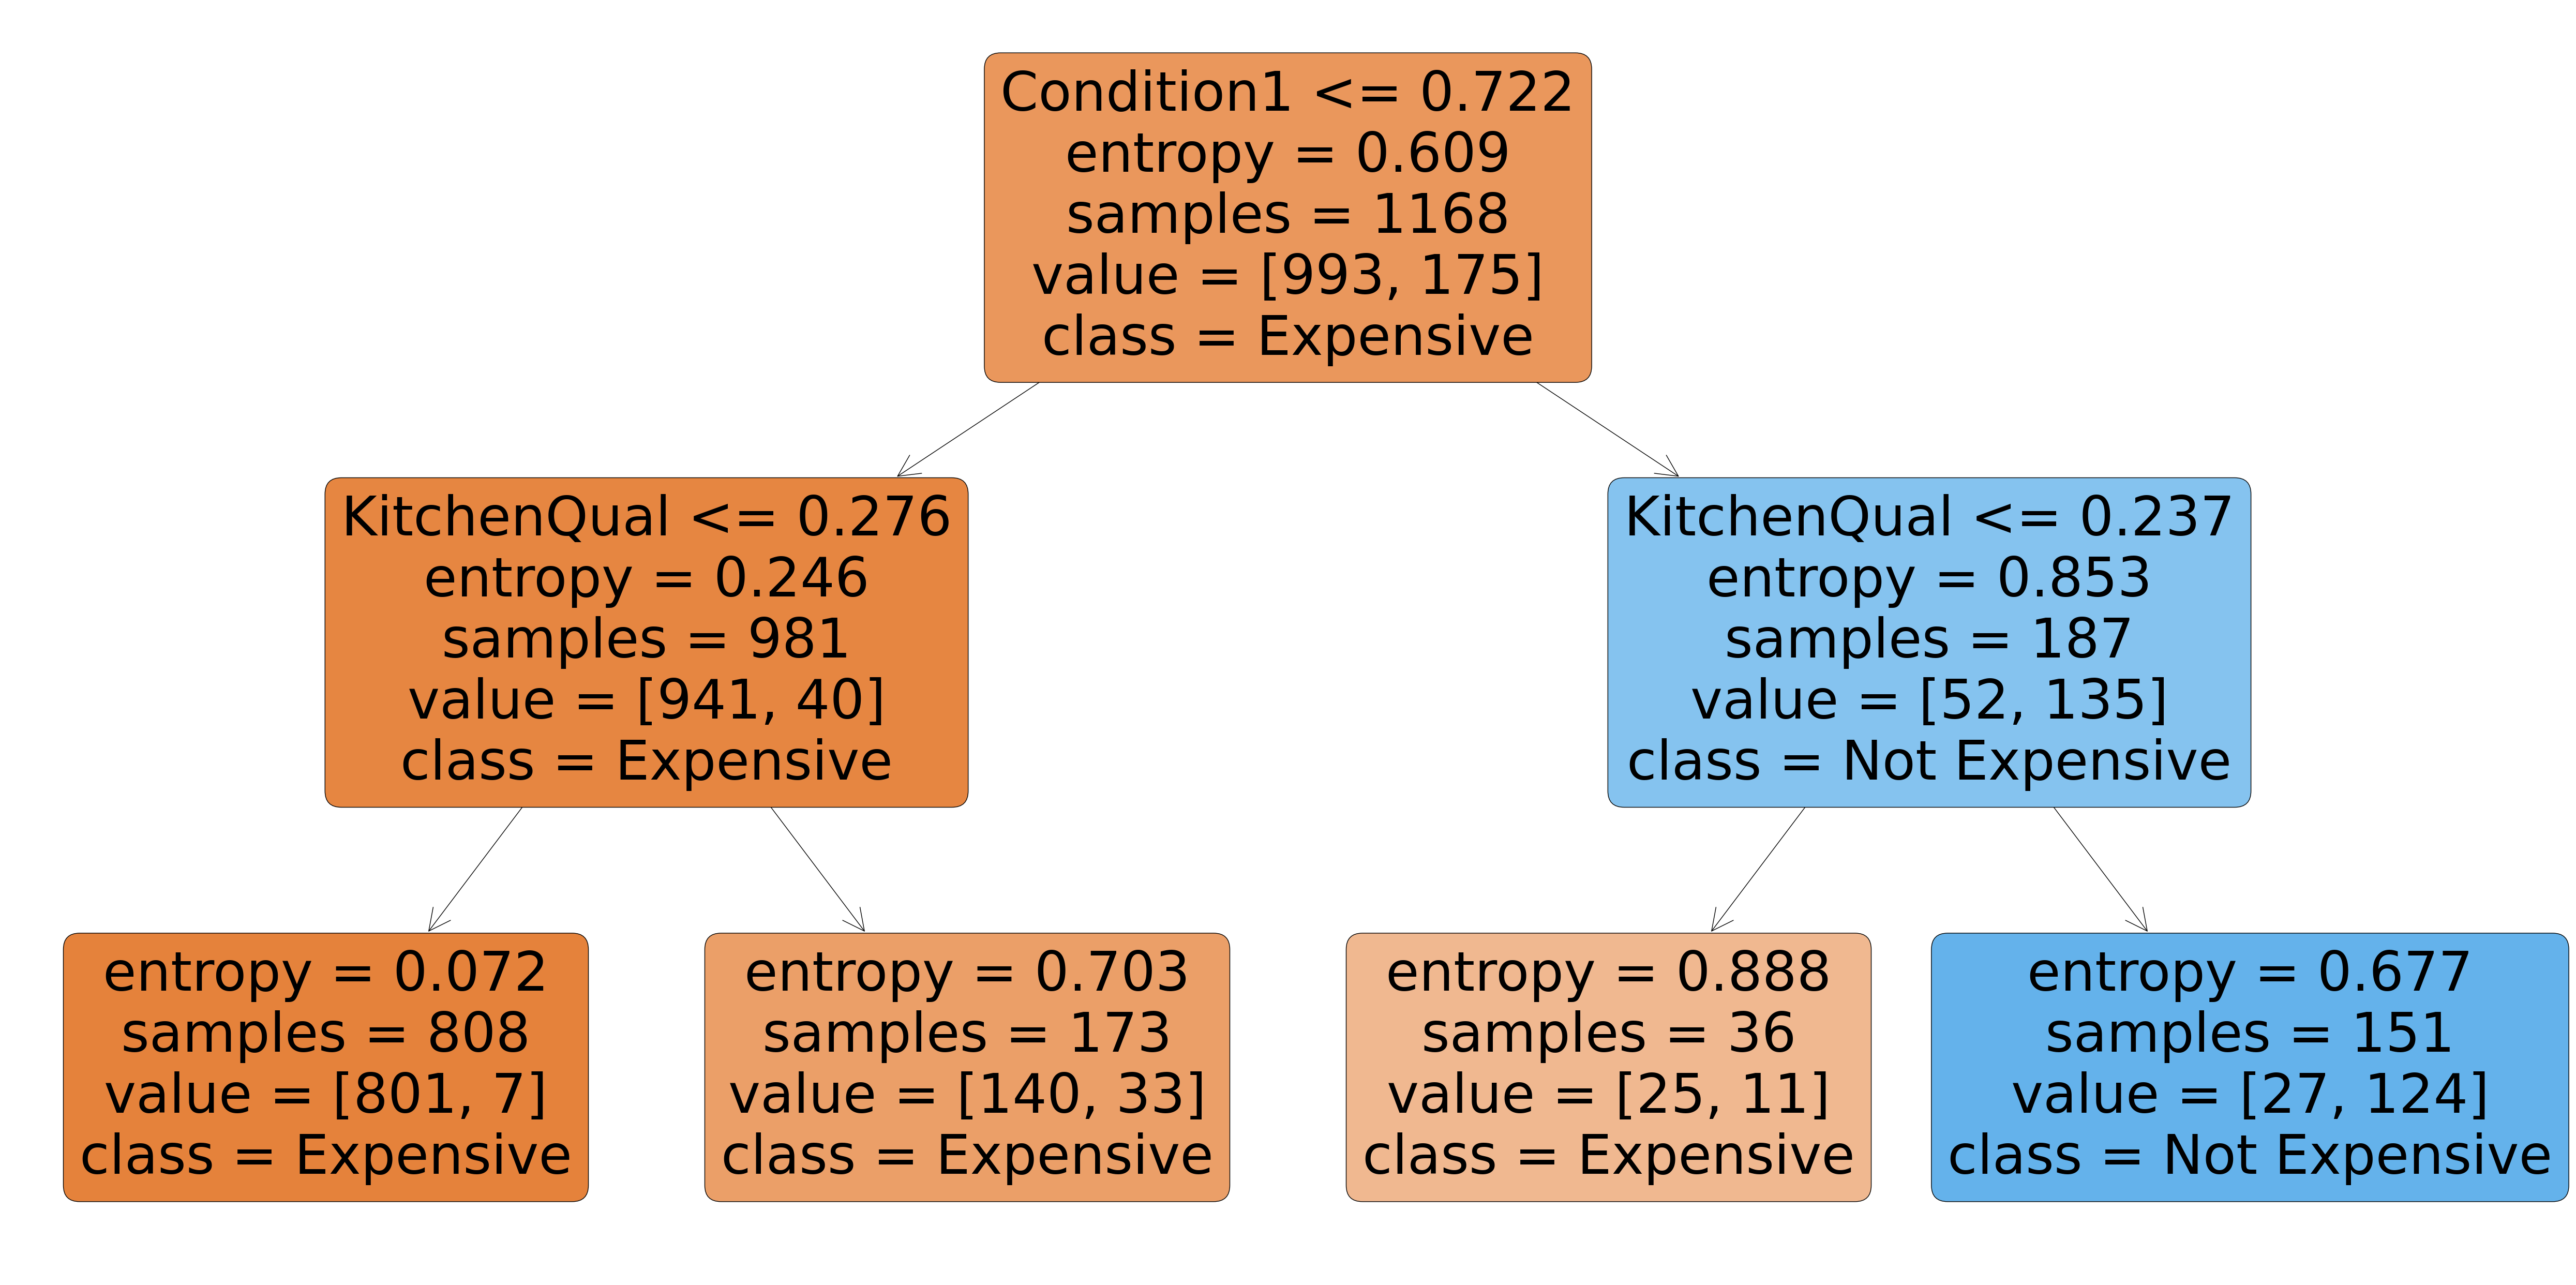

In [ ]:
# plott the decision tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     search.best_estimator_['decisiontreeclassifier'],
     filled=True,
     rounded=True,
     class_names=['Expensive','Not Expensive'],
     feature_names=X.columns
     );

**Random Forest Model**
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe_RF = make_pipeline(preprocessor , RandomForestClassifier())

In [ ]:
pipe_RF.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRem...
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
accuracy_score(y_test,pipe_RF.predict(X_test)).round(2)

0.96

**Tune the model**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'randomforestclassifier__n_estimators': [ 200, 300 ,400],
    'randomforestclassifier__max_depth': [  20, 30, 40],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
search = GridSearchCV(pipe_RF, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'Overa...
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'randomforestclassifier__max_depth': [20, 30, 40],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [200, 300,
                                                                  400]},
             scoring='accuracy', verbose=1)

In [ ]:
search.best_params_


{'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 400}

In [ ]:
search.best_params_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'Ye...
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=400))])

In [ ]:
search.best_score_.round(2)

0.95

**Import the test data**

In [ ]:
url = "https://drive.google.com/file/d/1i_fXk6wQH0_OT5S8F83yy0ePU3VzecEF/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
new_data = pd.read_csv(path)

In [ ]:
data.shape

(1460, 81)

In [ ]:
new_data.shape

(1459, 80)

**Tipp :drop the columns the same as in the train data**

In [ ]:
id_col = new_data.pop('Id')

In [ ]:
new_data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtFinType2',

In [ ]:
search.best_estimator_.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'Ye...
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, min_samples_split=5,
                                        n_estimators=200))])

In [ ]:
expensive = search.best_estimator_.predict(new_data)
expensive

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission_file = pd.DataFrame({
    'Id':id_col,
    'Expensive':expensive
})

In [ ]:
submission_file.head()

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0


**Import the competition file**

In [ ]:
from google.colab import files
submission_file.to_csv('submission_Menna.csv',index=False)
files.download('submission_Menna.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>